In [77]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
MNIST=fetch_openml('MNIST_784',as_frame=False)
x=MNIST.data
y=MNIST.target



C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 

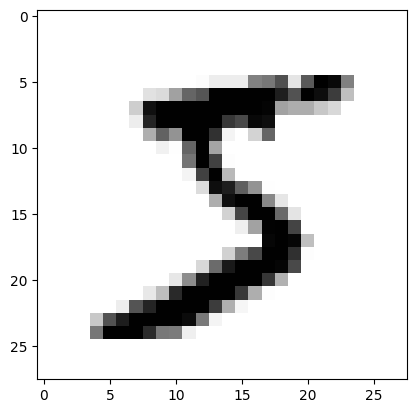

5


In [ ]:
image=x[0].reshape(28,28)
plt.imshow(image,cmap="binary")
plt.show()
print(y[0])

In [9]:
train_x,test_x,train_y,test_y=x[:60000],x[60000:],y[:60000],y[60000:]

In [78]:
print(train_x.shape)

(60000, 784)


#developing a model that only predicts data 5

In [59]:
trainy5= train_y=='5'

In [60]:
# 


from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42)
sgd.fit(train_x,trainy5)


SGDClassifier(random_state=42)

[ True]


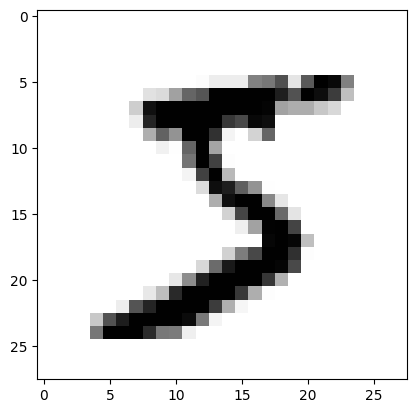

In [69]:
print(sgd.predict([train_x[0]]))
img=train_x[0].reshape(28,28)
plt.imshow(img,cmap="binary")
plt.show()
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score,cross_val_predict
# from sklearn.model_selection import KFold

# print(accuracy_score(sgd_pred,testy5))
# cvs=cross_val_score(sgd,train_x,trainy5,cv=3,scoring='accuracy')
# print(cvs)


In [ ]:
kf=KFold(n_splits=3,shuffle=True)
cvs=cross_val_score(sgd,train_x,trainy5,cv=kf,scoring='accuracy')


KeyboardInterrupt: 

In [ ]:
print(cvs)

[0.96915 0.96435 0.95875]


In [ ]:
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier()
ss=cross_val_score(dummy,train_x,trainy5,cv=3)
print(ss)

[0.90965 0.90965 0.90965]


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=3)
newss=cross_val_score(sgd,train_x,trainy5,cv=skf)
print(newss)

[0.95035 0.96035 0.9604 ]


In [ ]:
from sklearn.metrics import confusion_matrix
ypred=cross_val_predict(sgd,train_x,trainy5,cv=skf)
print(confusion_matrix(ypred,trainy5))


[[53892  1891]
 [  687  3530]]


<Axes: >

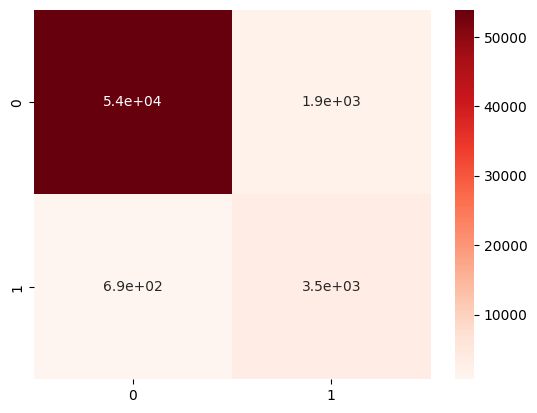

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(ypred,trainy5)
sns.heatmap(data=cm,annot=True,cmap='Reds')


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(ypred,trainy5))

0.7325171197343846


In [ ]:
yscores5=cross_val_predict(sgd,train_x,trainy5,cv=3,method='decision_function')
threshold=3000
from sklearn.metrics import precision_recall_curve,precision_score,recall_score
precision,recall,thresholds=precision_recall_curve(trainy5,yscores5)


In [ ]:
print(precision)
print(threshold)

[0.09035    0.09035151 0.09035301 ... 1.         1.         1.        ]
3000


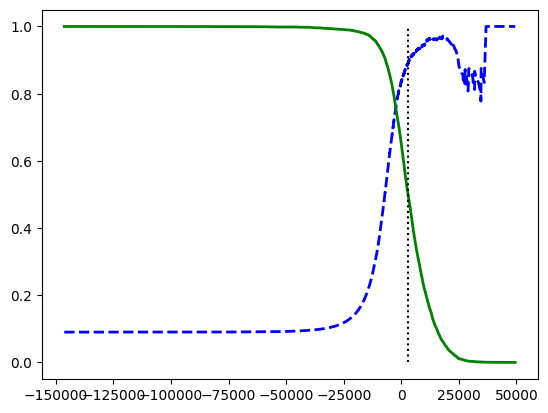

In [ ]:
plt.plot(thresholds, precision[:-1],"b--", label="Precision", linewidth=2)
plt.plot(thresholds,recall[:-1],"g-",label="recall",linewidth=2)
plt.vlines(threshold,0,1.0,"kp","dotted",label='threshold')

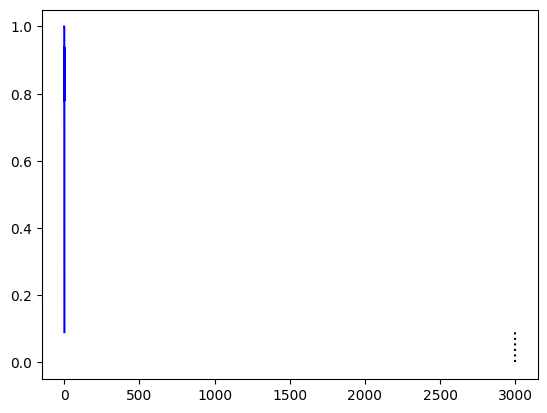

In [ ]:
plt.plot(recall,precision,"b-",label="precision/recall curve")
plt.vlines(threshold,0,0.1,"k","dotted")

In [72]:
idx = (thresholds >= threshold).argmax()
print(idx)

NameError: name 'thresholds' is not defined

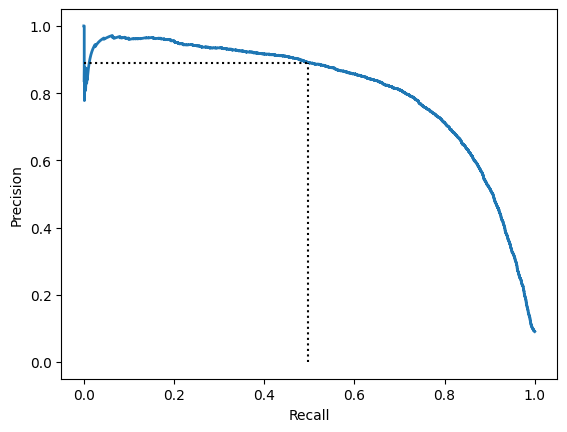

In [ ]:
# plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recall, precision, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recall[idx], recall[idx]], [0., precision[idx]], "k:")
plt.plot([0.0, recall[idx]], [precision[idx], precision[idx]], "k:")
# plt.plot([recalls[idx]], [precisions[idx]], "ko",
#          label="Point at threshold 3,000")
# plt.gca().add_patch(patches.FancyArrowPatch(
#     (0.79, 0.60), (0.61, 0.78),
#     connectionstyle="arc3,rad=.2",
#     arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#     color="#444444"))
# plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
# plt.axis([0, 1, 0, 1])
# plt.grid()
# plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")

plt.show()

In [ ]:
ts=(precision>=0.9).argmax()
ts90=thresholds[ts]
print(ts)
pred90=(yscores5>=ts90)
print(pred90)
print(precision_score(trainy5,pred90))
print(recall_score(trainy5,pred90))

57109
[False False False ...  True False False]
0.9000345901072293
0.4799852425751706


In [ ]:
print(len(trainy5))
print("\n\n\n",len(yscores5))

60000



 60000


In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(trainy5,yscores5)
tsidx=(threshold<=ts).argmax()
fpr_90,tpr_90=fpr[tsidx],tpr[tsidx]


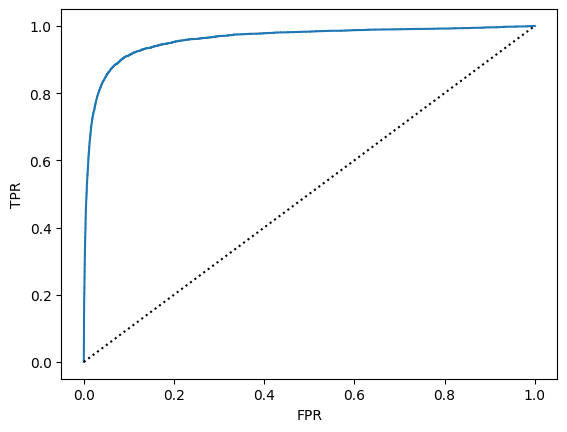

In [ ]:
plt.plot(fpr_90,tpr_90,"b--",label="90% precsion")
plt.plot(fpr,tpr,"ko",label="Roc curve")
plt.plot([0,1],[0,1],"k:",label="Random classifier's roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()



In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(trainy5,yscores5))

0.9604938554008616


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=42)

In [ ]:
proba=cross_val_predict(RFC,train_x,trainy5,method="predict_proba")

In [ ]:
print(proba[:2])

[[0.14 0.86]
 [0.99 0.01]]


In [ ]:
yscore5for=proba[:,1]
precisionfor,recallfor,thresholdsfor=precision_recall_curve(trainy5,yscore5for)
print(precisionfor,"\n-----------------------\n\n",recallfor,"---------------------\n\n",thresholdsfor)

[0.09035    0.15950686 0.22380539 0.28392473 0.34490225 0.40216907
 0.45535639 0.50476102 0.55228458 0.59822715 0.63802083 0.67044464
 0.69980481 0.7257498  0.75414442 0.7788266  0.80173575 0.82203781
 0.83767252 0.85080581 0.862421   0.87555702 0.88574774 0.89670963
 0.90503177 0.91254555 0.92066    0.92715349 0.93246382 0.93960699
 0.94425277 0.9478595  0.95270645 0.95538204 0.95900412 0.96229972
 0.96528832 0.96812369 0.97171989 0.9736893  0.97604674 0.97749511
 0.97897013 0.98120301 0.98264512 0.98432791 0.98504748 0.98596705
 0.98691207 0.98906991 0.99044057 0.99100042 0.99198819 0.99236479
 0.99337607 0.99354839 0.99349382 0.99388646 0.99449218 0.99489909
 0.99530201 0.99548023 0.99565814 0.99584007 0.99603267 0.99646059
 0.99689218 0.99758045 0.9977838  0.99774493 0.997968   0.99818559
 0.99841814 0.99865628 0.998635   0.99888579 0.99886428 0.99883957
 0.998812   0.99908537 0.9993752  0.99935897 0.99933928 0.99965765
 0.99964564 0.99963168 0.99961538 0.99959629 0.99957877 0.9995

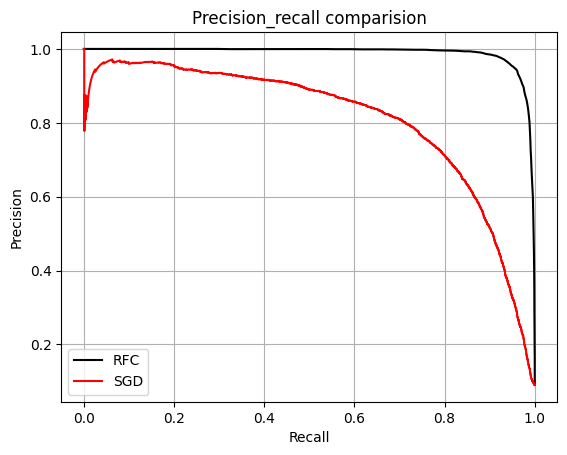

In [ ]:
plt.plot(recallfor,precisionfor,"k-",label="RFC")
plt.plot(recall,precision,"r-",label="SGD")
plt.legend()
plt.title("Precision_recall comparision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(visible=True)

In [ ]:

forpred=(proba[:,1]>=0.5)
print(forpred)


[ True False False ...  True False False]


In [ ]:
print("f1 Score",f1_score(trainy5,forpred))
print("roc_auc_score",roc_auc_score(trainy5,forpred))
print("precision score",precision_score(trainy5,forpred))
print("recall score",recall_score(trainy5,forpred))

f1 Score 0.9314961399394116
roc_auc_score 0.9391653846037241
precision score 0.9904405652535329
recall score 0.8791735842095554


In [ ]:
from sklearn.svm import SVC
svc=SVC(random_state=42)
svc.fit(train_x[:2000],train_y[:2000])
svc.predict([train_x[0]])


array(['5'], dtype=object)

In [ ]:
print(svc.classes_)
print(svc.decision_function([x[0]]).round(2))
svc.decision_function([x[0]]).argmax()

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[[ 3.79  0.73  6.06  8.3  -0.29  9.3   1.75  2.77  7.21  4.82]]


5

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr=OneVsRestClassifier(SVC(random_state=42))
ovr.fit(train_x[:2000],train_y[:2000])


OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr.predict([train_x[0]])

array(['5'], dtype='<U1')

In [ ]:
ovr.decision_function([train_x[0]])

array([[-1.32802451, -1.79073853, -1.39262214, -0.94416346, -2.29003973,
         0.80921042, -1.72304481, -1.20954271, -1.63739176, -1.79246052]])

In [8]:
sgd.fit(train_x[:2000],train_y[:2000])


SGDClassifier(random_state=42)

In [ ]:
sgd.decision_function([train_x[0]]).round(2)

array([[-1704540.27, -1683382.43, -2594122.51,  -145667.73, -3270741.37,
           -4883.95, -3420127.24, -1846510.17, -1328858.01, -2043246.17]])

In [10]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
train_x_scaled=scale.fit_transform(train_x.astype("float64"))

In [ ]:
print(cross_val_score(sgd,train_x,train_y,scoring="accuracy",cv=3))

[0.87365 0.85835 0.8689 ]


In [ ]:
print(train_x_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(cross_val_score(sgd,train_x_scaled,train_y,scoring="accuracy"))

In [ ]:
import numpy as np

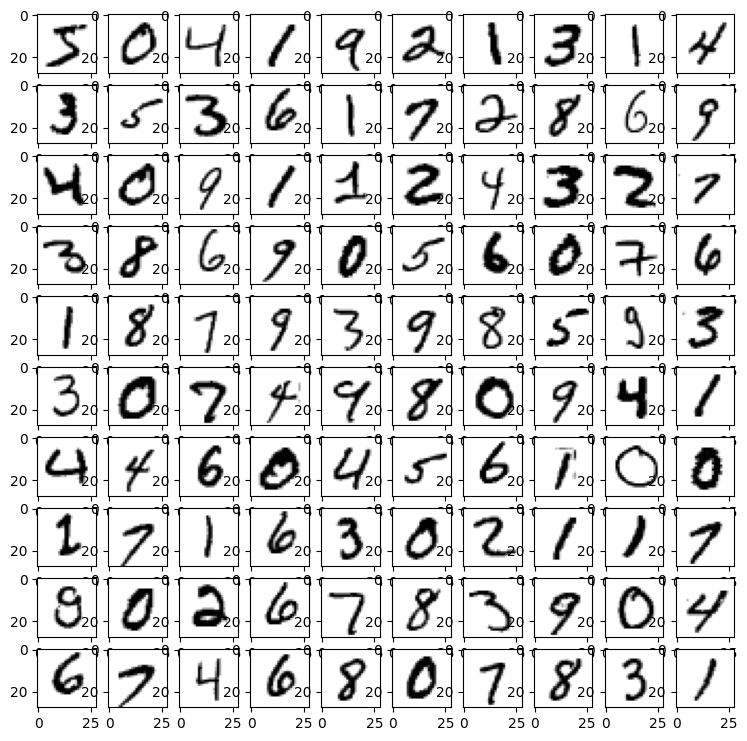

In [ ]:
plt.figure(figsize=(9,9))
for idx,image in enumerate(train_x[:100]):
    
    plt.subplot(10,10,idx+1)
    image=image.reshape(28,28)
    plt.imshow(image,cmap="binary")
plt.show()

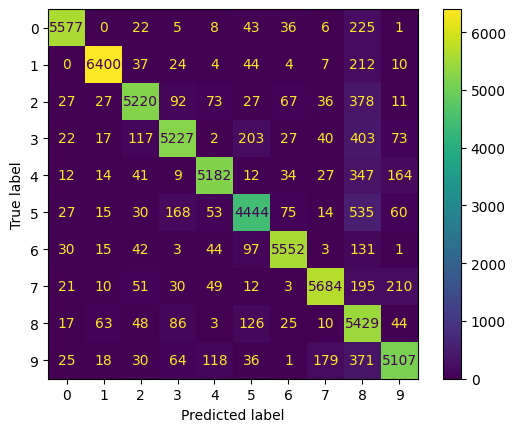

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
predy=cross_val_predict(sgd,train_x_scaled,train_y,cv=3)
ConfusionMatrixDisplay.from_predictions(train_y,predy)

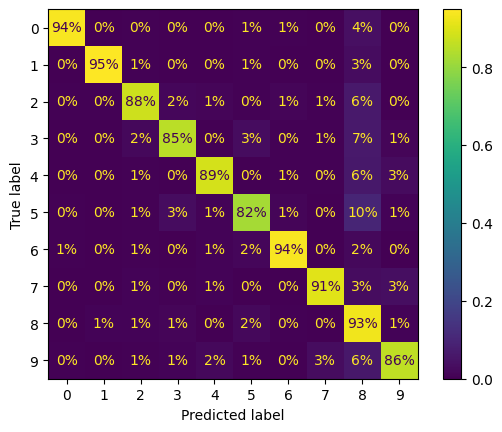

In [ ]:
ConfusionMatrixDisplay.from_predictions(train_y,predy,normalize="true",values_format=".0%")


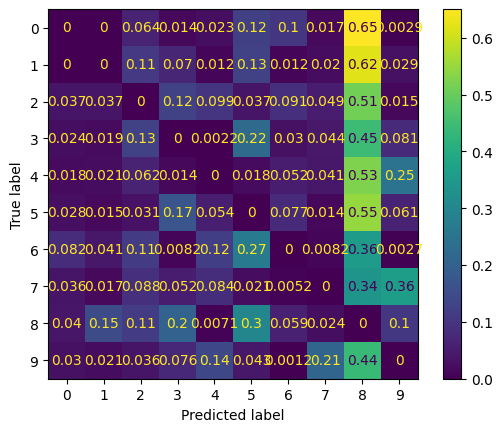

In [ ]:
weight=(predy!=train_y)
ConfusionMatrixDisplay.from_predictions(train_y,predy,sample_weight=weight,normalize="true")

In [17]:
xaa=train_x[(train_y=='3') & (predy=='3')]
xab=train_x[(train_y=='3') & (predy=='5')]
xba=train_x[(train_y=='5') & (predy=='3')]
xbb=train_x[(train_y=='5') & (predy=='5')]





In [22]:
plt.figure(figsize=(10,10))
print("xaa:",len(xaa))
print("xab",len(xab))
print("xbb",len(xbb))
print("xba",len(xba))
# for idx,image in enumerate(xaa):
#     image=image.reshape(28,28)
#     plt.subplot(10,1,idx+1)
#     plt.imshow(image,cmap="binary")
# plt.show()


5227


<Figure size 1000x1000 with 0 Axes>

In [27]:
to_see=xaa[:15]

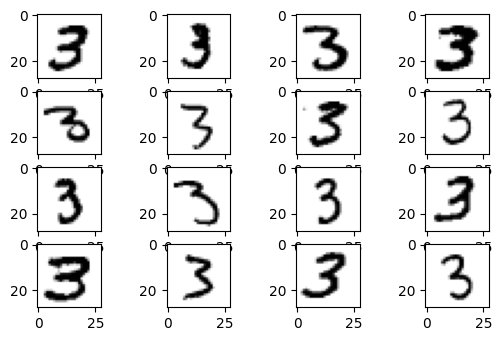

In [33]:
for idx,image in enumerate(to_see):
    image=image.reshape(28,28)
    plt.subplot(5,4,idx+1)
    plt.imshow(image,cmap="binary")
plt.show()

In [ ]:
for idx,image in enumerate(xaa):
    image=image.reshape(28,28)
    plt.subplot(10,10,idx+1)
    plt.imshow(image,cmap="binary")
plt.show()

In [ ]:
for idx,image in enumerate(xaa):
    image=image.reshape(28,28)
    plt.subplot(10,10,idx+1)
    plt.imshow(image,cmap="binary")
plt.show()

In [15]:
import numpy as np
odd=(train_y.astype('int8')%2==1)
print(odd)
large=(train_y>='7')
y_mul=np.c_[large,odd]



[ True False False ...  True False False]


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
knn=KNeighborsClassifier()
knn.fit(train_x,y_mul)
knn_pred=cross_val_predict(knn,train_x,y_mul,cv=3)
print(f1_score(y_mul,knn_pred,average="macro"))
print(f1_score(y_mul,knn_pred,average="weighted"))
print("predict for value 5: ",knn.predict([train_x[0]]))

0.976410265560605
0.9778357403921755
predict for value 5:  [[False  True]]


In [36]:
from sklearn.svm import SVC
from sklearn.multioutput import ClassifierChain
clch=ClassifierChain(SVC(),cv=3,random_state=42)
clch.fit(train_x[:2000],y_mul[0:2000])
clch.predict([train_x[0]])


array([[0., 1.]])

In [39]:
np.random.seed(42)
noise=np.random.randint(0,100,(len(train_x),784))
trainx_mod=train_x+noise
noise=np.random.randint(0,100,(len(test_x),784))
testx_mod=test_x+noise
trainy_mod=train_x
testy_mod=test_x


In [45]:
imagetrain=trainx_mod[0].reshape(28,28)

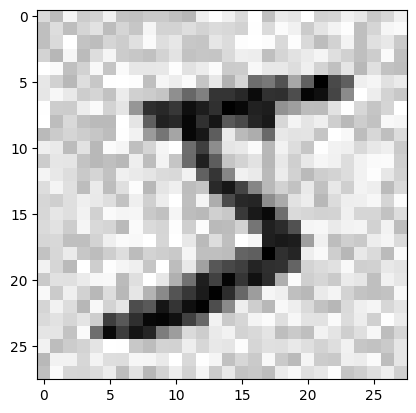

In [46]:
plt.imshow(imagetrain,cmap="binary")
plt.show()


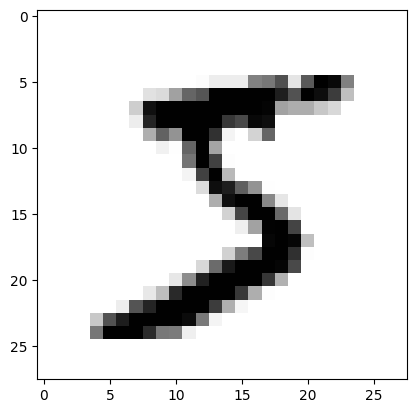

In [49]:
imagetest=trainy_mod[0].reshape(28,28)
plt.imshow(imagetest,cmap="binary")
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(trainx_mod,trainy_mod)


ValueError: Expected 2D array, got 1D array instead:
array=[ 21.  66.  64.  33.  83.  14.  36.  61.  91.  56.  35.  67.  23.  93.
  66.  32.  92.  27.  51.   7.  27.   3.   5.  69.  33.  29.  86.  12.
  53.   1.  51.   5.   6.  88.  83.   6.  93.   9.  11.  99.  76.  78.
  26.  98.  83.  72.  21.  97.  14.  54.  27.  51.  10.  27.  98.  82.
  75.  33.  97.  97.   9.  87.  36.  21.  75.  99.  91.  91.  52.  70.
  34.  79.  60.  94.  75.   9.  69.   5.  65.   8.  75.  18.  93.  37.
  91.  83.   2.  76.  22.  61.  67.  62.  69.  86.  90.  60.  19.  65.
  67.  26.  85.  84.  10.  54.  59.  86.  86.  61.  94.   2.  25.  78.
  95.  47.   1.  91.  49.  38.  82.  91.   4.  37.  92.  31.  78.  29.
  55.  45.  34.   7.  25.  47.  54.   9.  94.  66.  90.  77.  94.  89.
  21.  81.  11.  47.   2.  25.  25.  98.  43.   6.  96.  48.  88.  78.
   4.  34.  64.  58.   6.  18.  57.  32.  94.  98.  39.  40.  48.  79.
  77.  62.  84.  73.  92.  45.  34.  81.  20.  48.  26.  21.  43.  46.
  52.  33.   0.  13.  18.  33.  75.  71.   4.  73.  55.  21.  48.  43.
  43.   2.  35.  26.  94.   2. 167. 203. 219. 231.  91. 132.   0.   7.
  41.  72.  63.  38.  66.  83.  43.  85.  10.  24.  40.  68.  11.  45.
  35.  35.  39.  95.  20.  70. 256. 316. 268. 282. 273. 298. 277. 292.
 203. 276. 215. 264. 253. 228. 219.  77.  93.  55.  76.  80.  73.  21.
  34.   2.  48.   0.  22.  70.  79. 151.  79. 119. 257. 318. 340. 260.
 266. 340. 263. 278. 273. 279. 336. 233.   7.  68.  83.  12.  95.  44.
  75.  79.  87.  77.  39.  78.  72.   4.  33.  87.  85.  67. 126.  36.
 111. 122.  93. 103.  94. 290. 340. 195.   4.  85.  16.  96.  35.  13.
  99.  69.  30.  48.  26.  39.  26.   5.  65.   8.  57.  17.  23.  90.
  53.  69.  90.  12. 180. 347. 275.  65.  20.   1.  50.  41.  18.  83.
  71.  27.  32.  36.  50.  46.  79.  25.  45.  62.  86.   5.  73.   1.
  48.  11.  74.  33. 251. 285. 137.  34.  65.  34.  36.  94.  50.  12.
   2.  44.  51.  35.  22.  89.  10.  37.  27.  30.  35.  22.  38.  85.
  92.  80.  85. 142. 316. 254. 119.  21.  35.  43.  26.  62.  70.  40.
   7.  48.  50.  10.  59.  32.  50.  95.  48.  91.  30.   6.  98.  40.
  64.  77.  60. 337. 320.  87.  70.  42.  95.  99.  38.  88.  67.  25.
  40.  99.  93.  78.  41.  70.  16.  44.  78.  47.  23.  17.  28.   6.
  17.  46. 205. 353. 224.  11.  27.   0.  61.  17.  33.  30.  96.   9.
  54.  71.   1.  85.  40.  33.  57.   7.  38.  93.   0.  79.  32.  20.
  89.  29. 277. 297.  97.  93.  40.  17.  28.  94.  19.  73.  31.  96.
  94.  95.   7.  28.  15.  79.  70.  54.  42.  17.  43.  11.  23.  70.
  83. 159. 332. 279.  90.  46.  81.  37.  58.  42.  18.   7.  74.   4.
  41.  88.  20.  34.  11.  87.   3.   8.  89.  19.  78.  28.  16.  37.
 174. 268. 298.  72.  22.   2.  98.   5.  56.  25.  64.  26.  44.  89.
  94.  70.  16.  62.   2.  77.   2.  16.  74.  80.  29.  82.  32.  45.
 305. 341. 167.  40.   8.  11.  82.  60.  42.  56.  24.  41.  46.  91.
  50.  74.  86.  26.  99.  32.  72.   5.   8.  71.  54.  35.  68. 239.
 336. 259.  56.  47.  10.  35.  42.  66.  87.  72.  25.  69.  80.  52.
  42.  99.  82.  72.  87.  74.  52.  80.  96.  67.  74.  92.  92. 265.
 304.  81.  21.  62.  90.  73.  58.  21.  87.  41.  66.  80.  79.  48.
  43.  20.  55.  99.  83.  98.  14.  40.  91.  90.  39. 111. 307. 264.
 141.  87.  53.  57.  94.  93.  51.  43.  58.  61.  14.  97.  55.  84.
  86.  55.  93.  58.   3.  75.  57.  62.  53.  45.  38. 225. 305. 344.
  83.  43.   8.  90.  16.  74.  65.  58.  76.  92.  54.  15.  44.  52.
  95.  46.   0.  67.  38.  22.  84.   3.  93.  37. 127. 290. 302. 284.
 139.  12.  35.  19.  26.  38.  75.  97.  35.  26.  98.  91.  58.  33.
  96.  62.  53.  52.  51.  70.  66.  23.  32.  30. 209. 254. 326. 260.
 136.  46.  64.   1.  74.  94.  50.  54.  82.  70.   1.   8.  74.  27.
  99.  47.  41.  69.  91.  90.  36.  55.  11.  82. 188. 269. 222.  74.
  15.  39.  38.  85.  62.  32.  50.  67.  59.  83.  21.  13.  19.  42.
  51.  30.  92.  25.  31.  82.  93.  34.  91.  88.  21.  37.  47.  78.
  46.  12.  59.  79.  80.  71.   1.  91.   4.  94.  21.  58.   4.  73.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

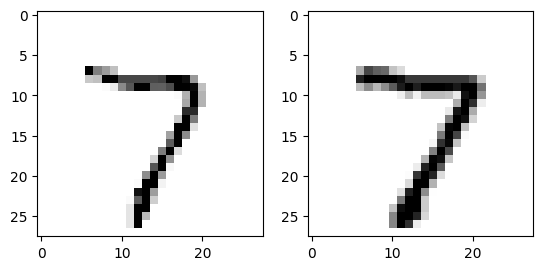

In [56]:
predmod=knn.predict([testx_mod[0]]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(predmod,cmap="binary")
plt.subplot(1,2,2)
plt.imshow(testy_mod[0].reshape(28,28),cmap="binary")
plt.show()

# Exercises:
1) MNIST data set with 97 % accuracy using Kn classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param_grid={"weights":['distance','uniform'],
            "n_neighbors":[2,3,4,5]}
grid=GridSearchCV(knn,param_grid,cv=3)
grid.fit(train_x,train_y)
print(grid.best_params_())

TypeError: 'dict' object is not callable

In [12]:
print(grid.best_params_)


{'n_neighbors': 4, 'weights': 'distance'}


In [24]:
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score
knn=KNeighborsClassifier(**grid.best_params_)
knn.fit(train_x,train_y)
knn_pred=knn.predict(test_x)
print("f1_score:",f1_score(test_y,knn_pred,average="macro"))
print("accuracy_score:",accuracy_score(test_y,knn_pred,))


f1_score: 0.971224084176584
accuracy_score: 0.9714


2) Data augmentation by adding shifted image data to training set to improve performance

In [106]:
import numpy as np
from  scipy.ndimage import shift
train_x_down=[]
train_x_up=[]
train_x_right=[]
train_x_left=[]
for i in train_x[:10000]:
    i=i.reshape(28,28)
    train_x_down.append(shift(i,[1,0],cval=0))
    train_x_right.append(shift(i,[0,1],cval=0))
    train_x_up.append(shift(i,[-1,0],cval=0))
    train_x_left.append(shift(i,[0,-1],cval=0))
train_y_new=np.array([train_y[:10000],train_y[:10000],train_y[:10000],train_y[:10000]])
train_x_new=np.array([train_x_down,train_x_up,train_x_right,train_x_left])



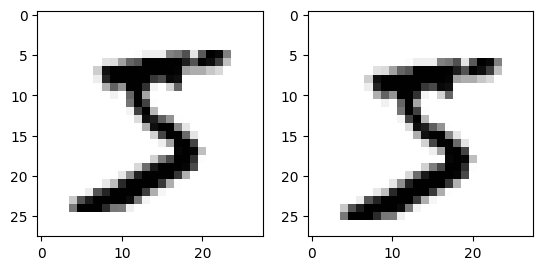

In [105]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(train_x[0].reshape(28,28),cmap="binary")
plt.subplot(1,2,2)
plt.imshow(train_x_down[0],cmap="binary")
plt.show()

In [107]:
print(train_x_new.shape)
print(train_y_new.shape)

(4, 10000, 28, 28)
(4, 10000)


In [108]:
train_x_new=train_x_new.reshape(40000,784)
train_y_new=train_y_new.reshape(40000)
print(train_x_new.shape)
print(train_y_new.shape)


(40000, 784)
(40000,)


In [113]:
knn.fit(train_x_new,train_y_new)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [114]:
knn_pred_new=knn.predict(test_x)

In [115]:
f1_score(test_y,knn_pred_new,average="macro")

0.9579730373641804

3) Titanic survival data sets:

In [470]:
import pandas as pd
ds=pd.read_csv("Titanic_train.csv")

In [471]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# testing the number of unique values carried by object type attributes

In [472]:
print("Unique Name count:",len(ds["Name"].unique()))
print("Unique Ticket count:",len(ds["Ticket"].unique()))
print("Unique Cabin count:",len(ds["Cabin"].unique()))
print("Unique EMbarked count:",len(ds["Embarked"].unique()))

Unique Name count: 891
Unique Ticket count: 681
Unique Cabin count: 148
Unique EMbarked count: 4


# Since Name and Ticket have large number of unique values they consume large abount of time for processing and there seems to be no relationship between the survival status and the name of the person and the type of ticket bought so we drop it

In [473]:
ds=ds.drop(columns=['Name','Ticket','Cabin'])


In [474]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None


In [475]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [476]:
trainx,testx,trainy,testy=train_test_split(ds.drop(columns=["Survived"]),ds['Survived'],test_size=0.2)



In [480]:
testy[:10]

430    1
52     1
248    1
77     0
203    0
400    1
283    1
723    0
640    0
533    1
Name: Survived, dtype: int64

In [477]:
col=trainx.columns
col

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [478]:
trainx=oe.fit_transform(trainx)

In [479]:
trainy

791    0
808    0
87     0
697    1
715    0
      ..
36     1
136    1
746    0
452    0
725    0
Name: Survived, Length: 712, dtype: int64

In [481]:
trainx=pd.DataFrame(trainx,columns=col)

In [482]:
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
imp=SimpleImputer(strategy="mean")
imp.fit_transform(trainx)


array([[627.,   1.,   1., ...,   0., 124.,   2.],
       [641.,   1.,   1., ...,   0.,  75.,   2.],
       [ 61.,   2.,   1., ...,   0.,  36.,   2.],
       ...,
       [589.,   2.,   1., ...,   1., 106.,   2.],
       [351.,   0.,   1., ...,   0., 132.,   0.],
       [574.,   2.,   1., ...,   0.,  45.,   2.]])

In [483]:
trainx=pd.DataFrame(trainx,columns=col)

In [484]:
print(trainx.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    float64
 1   Pclass       712 non-null    float64
 2   Sex          712 non-null    float64
 3   Age          573 non-null    float64
 4   SibSp        712 non-null    float64
 5   Parch        712 non-null    float64
 6   Fare         712 non-null    float64
 7   Embarked     710 non-null    float64
dtypes: float64(8)
memory usage: 44.6 KB
None


In [526]:
print(trainx.corrwith(trainy["Survived"]))

PassengerId    0.045496
Pclass        -0.344539
Sex           -0.515231
Age           -0.114823
SibSp         -0.015073
Parch          0.114418
Fare           0.327733
Embarked      -0.173235
dtype: float64


In [485]:
index=trainx[trainx["Age"].isnull()].index
index

Index([  2,   3,  19,  20,  21,  24,  27,  31,  32,  34,
       ...
       662, 663, 665, 669, 671, 674, 683, 692, 696, 707],
      dtype='int64', length=139)

In [486]:
trainx=trainx.drop(index=index)

In [487]:
print(trainx.info())

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 711
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  573 non-null    float64
 1   Pclass       573 non-null    float64
 2   Sex          573 non-null    float64
 3   Age          573 non-null    float64
 4   SibSp        573 non-null    float64
 5   Parch        573 non-null    float64
 6   Fare         573 non-null    float64
 7   Embarked     571 non-null    float64
dtypes: float64(8)
memory usage: 40.3 KB
None


In [488]:
trainy=np.array(trainy)

In [489]:
trainy=pd.DataFrame(trainy,columns=['Survived'])

In [490]:
trainy=trainy.drop(index=index)

In [491]:
print(trainx.info(),trainy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 711
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  573 non-null    float64
 1   Pclass       573 non-null    float64
 2   Sex          573 non-null    float64
 3   Age          573 non-null    float64
 4   SibSp        573 non-null    float64
 5   Parch        573 non-null    float64
 6   Fare         573 non-null    float64
 7   Embarked     571 non-null    float64
dtypes: float64(8)
memory usage: 40.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 711
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  573 non-null    int64
dtypes: int64(1)
memory usage: 9.0 KB
None None


In [492]:
index=trainx[trainx["Embarked"].isnull()].index
index

Index([209, 545], dtype='int64')

In [493]:
trainy=trainy.drop(index=index)
trainx=trainx.drop(index=index)

In [527]:
trainx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 711
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  571 non-null    float64
 1   Pclass       571 non-null    float64
 2   Sex          571 non-null    float64
 3   Age          571 non-null    float64
 4   SibSp        571 non-null    float64
 5   Parch        571 non-null    float64
 6   Fare         571 non-null    float64
 7   Embarked     571 non-null    float64
dtypes: float64(8)
memory usage: 40.1 KB


In [494]:
testy

430    1
52     1
248    1
77     0
203    0
      ..
401    0
785    0
328    1
250    0
242    0
Name: Survived, Length: 179, dtype: int64

In [540]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
param={'n_estimators':np.arange(1,5),
       'max_depth':np.arange(1,10),
       'min_samples_split':np.arange(1,8)
       }
knn=RandomForestClassifier(random_state=42)
rscv=RandomizedSearchCV(knn,param_distributions=param,n_iter=10,cv=3)
rscv.fit(trainx,trainy)


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7]),
                                        'n_estimators': array([1, 2, 3, 4])})

In [550]:
rfc=RandomForestClassifier(**rscv.best_params_)
rfc.fit(trainx,trainy)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=3)

In [496]:
print(testy.info())

<class 'pandas.core.series.Series'>
Index: 179 entries, 430 to 242
Series name: Survived
Non-Null Count  Dtype
--------------  -----
179 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB
None


In [541]:
testx=oe.fit_transform(testx)

In [542]:
testx=pd.DataFrame(testx,columns=col)

In [543]:
testx.info()
index=testx[testx["Age"].isnull()].index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  141 non-null    float64
 1   Pclass       141 non-null    float64
 2   Sex          141 non-null    float64
 3   Age          141 non-null    float64
 4   SibSp        141 non-null    float64
 5   Parch        141 non-null    float64
 6   Fare         141 non-null    float64
 7   Embarked     141 non-null    float64
dtypes: float64(8)
memory usage: 8.9 KB


In [500]:
testy

430    1
52     1
248    1
77     0
203    0
      ..
401    0
785    0
328    1
250    0
242    0
Name: Survived, Length: 179, dtype: int64

In [544]:
testy=np.array(testy)

In [545]:
testy=pd.DataFrame(testy,columns=['Survived'])

In [513]:
testy

,Survived
0,1
1,1
2,1
3,0
4,0
...,...
174,0
175,0
176,1
177,0


In [546]:
testx=testx.drop(index=index)


In [547]:
testy=testy.drop(index=index)

In [517]:
print(testx.count())
print(testy.count())

PassengerId    141
Pclass         141
Sex            141
Age            141
SibSp          141
Parch          141
Fare           141
Embarked       141
dtype: int64
Survived    141
dtype: int64


In [552]:
pred=rfc.predict(testx)
print(len(pred))

141


In [536]:
print(len(testy))

141


In [553]:
from sklearn.metrics import f1_score
print(f1_score(testy,pred))

0.6947368421052632
